# 1. Bi-variate linear regression

# 1.1. Basic approach - least square estimate
One of the basic models to try, while learning dependence between two real-valued variables $x$ (explaining/independent variable/regressor/covariate) and $y$ (responce/dependent variable) is linear:
$$
y=w_1 x + w_0.
$$
$w_1$-slope coefficient, $w_0$ - intercept. Admitting that the model's accuracy is not absolute: 
$$
y=w_1 x + w_0 +\varepsilon,\hspace{5ex} (1)
$$
where $\varepsilon$ is the model's error (often called noise or residual).

The objective is to learn $b$ given a training set of $\{(x_i, y_i), i=1..N\}$. Usually the objective is to find $w=(w_1,w_0)$ providing the best possible fit of the model, i.e. minimizing absolute values of the errors
$\varepsilon_i=y_i-\hat{y}_i=y_i-w_1 x_i-w_0$, where $\hat{y}_i$ denotes the predicted value corresponding to $x_i$.

Most common quality function for the given model is the residual sum of squares:
$$
RSS(w)=\sum\limits_i \varepsilon_i^2=\sum\limits_i (y_i-w_1 x_i-w_0)^2. \hspace{5ex} (2)
$$
Minimizing $RSS(w)\to min$ is called a least square approach. With respect to this criteria, regression becomes an optimization problem
$$
\hat{w}=argmin_w RSS(w). \hspace{5ex} (3)
$$
Luckily this problem has a precise analytic solution following from function's shape and local extremum criteria:
$$
\left\{\begin{array}{c}\frac{\partial RSS(\hat{w})}{\partial w_1}=0,\\ \frac{\partial RSS(\hat{w})}{\partial w_0}=0.\end{array}\right.
$$
i.e.
$$
\left\{\begin{array}{c}\sum\limits_i 2x_i(y_i-\hat{w}_1 x_i-\hat{w}_0)=0,\\ \sum\limits_i 2(y_i-\hat{w}_1 x_i-\hat{w}_0)=0,\end{array}\right.
$$
$$
\left\{\begin{array}{c}\hat{w}_1\left(\sum\limits_i (x_i)^2\right)+\hat{w}_0\left(\sum\limits_i x_i\right)=\sum\limits_i x_i y_i,\\ \hat{w}_1\left(\sum\limits_i x_i\right)+N \hat{w}_0=\sum\limits_i y_i,\end{array}\right.
$$
$$
\left\{\begin{array}{c}\hat{w}_1=\frac{\sum\limits_i x_i y_i-\left(\sum\limits_i y_i\right)\left(\sum\limits_i x_i\right)/N}{\sum\limits_i (x_i)^2-\left(\sum\limits_i x_i\right)^2/N}=\frac{E[XY]-E[X]E[Y]}{E[X^2]-E[X]^2}=\frac{E[X-E[X]][Y-E[X]]}{var[X]}=\frac{cov(X,Y)}{var[X]}=corr[X,Y]\frac{std[Y]}{std[X]},\\
\hat{w}_0=\frac{\sum\limits_i y_i-\hat{w}_1\left(\sum\limits_i x_i\right)}{N}=E[Y]-E[X]\hat{w}_1\end{array}\right.
$$

# 1.2. Example: real estate prices in NYC

Consider NYC real estate prices for multi-apartment houses in Bronx (zip code 10466), specifically their dependence on the house size (gross square footage)

In [1]:
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


Correlation=0.92647798714
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     812.1
Date:                Mon, 21 Sep 2015   Prob (F-statistic):           9.99e-59
Time:                        03:20:27   Log-Likelihood:                -2038.2
No. Observations:                 136   AIC:                             4080.
Df Residuals:                     134   BIC:                             4086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      1.899

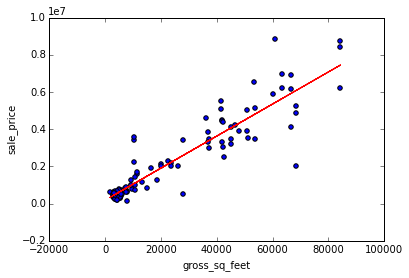

In [2]:
data = pd.read_csv('https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/lab2/data4session2/NYC_RE_10466__multi.csv', index_col=0)
data.head()
corr=stats.pearsonr(data.gross_sq_feet,data.sale_price)[0]
print('Correlation={0}'.format(corr))

data.plot(kind='scatter',x='gross_sq_feet',y='sale_price')
lm = smf.ols(formula='sale_price ~ gross_sq_feet', data = data).fit()
print(lm.summary())
lmy = lm.predict(data)
plt.plot(data.gross_sq_feet,lmy,'r-')

# 1.3. Probabilistic approach

Uncertainty of the model (1) prediction can be expressed by considering $\varepsilon$ as a random variable representing deviations of the actual values of $y$ from the estimates provided by the precise linear model. A basic assumption is to have $\varepsilon\sim{\cal N}(0,\sigma^2)$ (mean is zero as otherwise the intercept term $w_0$ could be corrected accordingly). 

Often observations $y_i,x_i$ are spread in time ($i$ - could be time of the observation). 
Classical regression assumptions (Gauss-Markov): $\sigma$ is the same for all observations (does not depend on time) and errors $\varepsilon_i$ following ${\cal N}(0,\sigma^2)$ are mutually uncorrelated, i.e. $cov(\epsilon_i,\epsilon_j)=0$ for $i\neq j$. 

An alternative way of representing this linear model is by considering $y$ a random variable and expressing it's conditional probability density function with respect to given $x$ and $w$ as
$$
p(y|x,w)={\cal N}(y|w_1 x+w_0,\sigma^2).\hspace{5ex} (4)
$$

This way it is actually the mean of the distribution (4) which is predicted by a linear model/
Now the problem is to fit unknown parameters of the model $w_1,w_0,\sigma$ (the last one $\sigma$ represents how usually close are the values of $y$ to the linear prediction), so that the model is the most consistent with the training data $\{(x_j,y_j), j=1..N\}$.

Fitting could be done through through maximizing the likelihood that the observed data $y_j$ actually follows the suggested distribution (4). Likelihood is defined as a product of probability density values $\prod\limits_j p(y_j|x_j)$. But it's actually more practical to maximize the log-likelihood (which is equivalent):
$$
\log\left(\prod\limits_j p(y_j|x_j)\right)=\sum\limits_j \log\left({\cal N}(y|w_1 x+w_0,\sigma^2)\right)=
$$$$
=-\sum\limits_j \frac{(y_j-w_1 x_j+w_0)^2}{2\sigma^2}- N \log(\sigma)-N \log(\sqrt{2\pi})\to\max
$$
Optimization with respect to $w$ turns out to be equivalent to the above least-square minimization (3). Then for minimal $RSS(\hat{w})$ acheived, $\sigma$ could be found from
$$
\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\sigma)\to\min
$$$$
\frac{\partial\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\sigma)}{\partial \sigma}=0,
$$$$
-\frac{RSS(\hat{w})}{\sigma^3}+\frac{N}{\sigma}=0,
$$$$
\sigma^2=\frac{RSS(\hat{w})}{N}.
$$

# 1.4. Scaling: log-scale regression

Now consider another zip code in Brooklyn - 11209 - and prices of single-residence houses

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     399.3
Date:                Mon, 21 Sep 2015   Prob (F-statistic):           1.25e-74
Time:                        03:20:44   Log-Likelihood:                -13680.
No. Observations:                 968   AIC:                         2.736e+04
Df Residuals:                     966   BIC:                         2.737e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      2.405e+05   2.81e+04      8.568

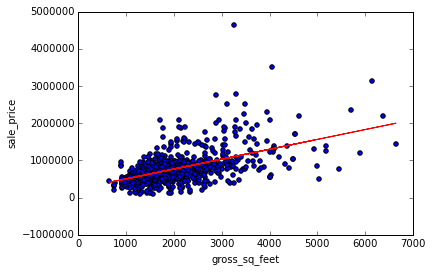

In [3]:
data = pd.read_csv('https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/lab2/data4session2/NYC_RE_11209__single.csv', index_col=0)
data.plot(kind='scatter',x='gross_sq_feet',y='sale_price')
llm = smf.ols(formula='sale_price ~ gross_sq_feet', data = data).fit()
print(llm.summary())
lmy = llm.predict(data)
plt.plot(data.gross_sq_feet,lmy,'r-')

Regression looks a little bit uncertain - for example confidence interval of the regression coefficient is pretty broad and also visually the picture looks quite scattered especially when the houses grow big. So what if the dependence is non-linear? Consider log-scale regression

                            OLS Regression Results                            
Dep. Variable:         log_sale_price   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     333.3
Date:                Mon, 21 Sep 2015   Prob (F-statistic):           3.36e-64
Time:                        03:20:49   Log-Likelihood:                -466.35
No. Observations:                 968   AIC:                             936.7
Df Residuals:                     966   BIC:                             946.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             8.6718      0.26

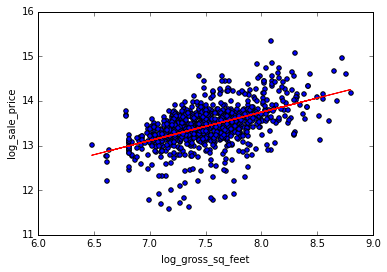

In [4]:
datalog=pd.DataFrame({'log_gross_sq_feet': log(data.gross_sq_feet),'log_sale_price':log(data.sale_price)})
datalog.plot(kind='scatter',x='log_gross_sq_feet',y='log_sale_price')
llm = smf.ols(formula='log_sale_price ~ log_gross_sq_feet', data = datalog).fit()
print(llm.summary())
lmy = llm.predict(datalog)
plt.plot(datalog.log_gross_sq_feet,lmy,'r-')

So real estate price of single-residence houses actually scales underlinearly with house size - the entire confidence interval for regression coefficient is substantially below 1. This way price is expressed like: $P\sim S^{0.63}$, i.e. if the size is doubled, the price goes up $55\%$ only.

# 1.5 Explanations of regression statistics

### R-squared

$$
R^2=1-\frac{RSS}{\sum\limits_i (y_i-\overline{y})^2}=\frac{\sum\limits_i (\hat{y}_i-\overline{y})^2}{\sum\limits_i (y_i-\overline{y})^2},
$$
where $\overline{y}=\sum\limits_i y_i$ is the sample mean of observed values of responce variable. This way $R^2$ is often interpreted as a fraction of responce variable's variance explained by linear model. $R^2=1$ is equivalent to $RSS=0$, i.e. the model fits the observations exactly, i.e. responce variable depends linearly on the explaining one. On the other hand, $R^2=0$ means that the model always predicts the sample mean $\overline{y}$, i.e. explaining variable $x$ has no effect on responce variable $y$. 

Least-square regression is equivalent to maximizing $R^2$.

For our case of having a single regressor, it could be shown that
$$
R^2=corr(x,y)^2,
$$
where $corr$ is the sample Pearson correlation coefficient between observed explaining and responce variable values (training set).

### Confidence intervals

Uncertainty of the model predictions has also the counterpart: uncertainty of the estimate for the coefficients. Although least-square/max-likelihood estimate provides the most probable valus for $w_1,w_0$, as long as the model fit is not precise, the actual dependence between $y$ and $x$ which we do not know but try to infer, could always be different. Assuming that there is indeed a certain true underlying dependence (4) between random varialbe $y$ and explaining variable $x$, it's coefficients $w$ might be different from those $\hat{w}$, we've estimated for our observed sample of $y$.

It could be then shown that for big sample sizes $N$, given our knowledge of the observed sample of $y$, the unknown slope coefficient $w_1$ treated as a random variable, has a distribution close to $w_1\sim {\cal N}(\hat{w}_1,Var[w_1])$, where
$$
Var[w_1]=\frac{N\cdot RSS(\hat{w})}{(N-2)Var[x]}\sim \frac{RSS(\hat{w})}{Var[x]}.
$$
However this is only the assymptotic distribution approached for large $N$. For real finite values of $N$ the actual distribution is slightly more complex (Students t-distribution).

Now an $(1-\alpha)$-confidence interval of the slope coefficient $w_1$ (i.e. interval which contains a real value of $w_1$ with a given confidence level $(1-\alpha)$) could be approximated using a correspondent Students or normal distribution's quantile function. This interval is usually reported within regression's parameters.

### P-value and t-statistics

Assume that we're making an assumption that actual slope coefficient is $w_1^*$. Then t-statistics
$$
t=\frac{w_1^*-\hat{w}_1}{\sqrt{Var[w_1]}}
$$
shows how relatively far away the hypothesized value is from the estimate $hat{w}_1$ we got. Based on that as well as the confidence interval estimate the $p$-value shows the probability of having an actual value of $w_1$ with even higher $t$-statistics and could be interpreted as our confidence level that the departure of $\hat{w_1}$ from the hypothesized value of $w_1^*$ is got just by chance. This way once $p$-value is lower than a certain threshold (typically $5\%$), the hypothesis that the true value of $w_1$ is $w_1^*$ is rejected.

The most common example is assuming a null-hypothesis $w_1^*=0$, meaning that explaining variable $x$ has actually no effect on responce variable $y$. This hypothesis is opposed to the idea of having a linear dependence between them with a non-zero slope coefficient. That is this $p$-value corresponding to the null-hypothesis, which is reported by bi-variate linear regression. It's meaning is the level of confidence that the null-hypothesis is true, i.e. $x$ has actually no linear effect on the responce variable $y$. Once $p$-value is below $5\%$ we reject this assumption. 

This provides a statistically significant evidence that $y$ is actually affected by $x$. This however does not prove that: 1) dependence between them is actually linear, or that 2) the estimate we have for the slope coefficient is the true one. In turn, having high value of $p$-value by itself does not prove that $y$ is independent on $x$ (first of all linear effect could be there, just disguised by noise, second - the effect could be non-linear).
